<a href="https://colab.research.google.com/github/diegoOrd123/Examen-Primer-parcial/blob/main/Primer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos las librerias necesarias

In [6]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [7]:
input_layer_size  = 14
num_labels = 5
data = pd.read_csv('/content/drive/MyDrive/Dataset/Base.csv', delimiter=';')
print(data.shape)

data.info()

(1000000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   income                        1000000 non-null  float64
 1   name_email_similarity         1000000 non-null  float64
 2   prev_address_months_count     1000000 non-null  int64  
 3   current_address_months_count  1000000 non-null  int64  
 4   customer_age                  1000000 non-null  int64  
 5   intended_balcon_amount        1000000 non-null  float64
 6   zip_count_4w                  1000000 non-null  int64  
 7   velocity_6h                   1000000 non-null  float64
 8   velocity_24h                  1000000 non-null  float64
 9   velocity_4w                   1000000 non-null  float64
 10  credit_risk_score             1000000 non-null  int64  
 11  bank_months_count             1000000 non-null  int64  
 12  proposed_credit

In [8]:


def generate_synthetic_data_with_perturbations(num_samples, real_data):
    synthetic_data = {}

    # Definir un rango de perturbaciones
    perturbation_scale = 0.1

    for col in real_data.columns:
        if real_data[col].dtype in [np.float64, np.int64]:
            unique_values = real_data[col].values

            # Generar datos sintéticos
            base_values = np.random.choice(unique_values, size=num_samples)
            perturbations = base_values * np.random.uniform(-perturbation_scale, perturbation_scale, size=num_samples)
            synthetic_data[col] = base_values + perturbations

        elif real_data[col].dtype == object:
            # Para columnas categóricas
            synthetic_data[col] = np.random.choice(real_data[col].unique(), size=num_samples)

    return pd.DataFrame(synthetic_data)



syntheticData = generate_synthetic_data_with_perturbations(1000000, data)

# Concatenar con el DataFrame original
combinedData = pd.concat([data, syntheticData], ignore_index=True)

print(combinedData.shape)

(2000000, 14)


In [9]:
y = combinedData.iloc[:, -1]
print(y)
mapping = {'AB': 0, 'AA': 1, 'AC': 2, 'AE': 3, 'AD': 4}
def convert_column_to_numeric(data, mapping):
    vectorized_map = np.vectorize(mapping.get)
    numeric_data = vectorized_map(data)
    return numeric_data
numeric_data = convert_column_to_numeric(y, mapping)
y = numeric_data
print(y)

0          AA
1          AD
2          AB
3          AB
4          AA
           ..
1999995    AA
1999996    AA
1999997    AD
1999998    AB
1999999    AD
Name: payment_type, Length: 2000000, dtype: object
[1 4 0 ... 4 0 4]


In [10]:
X=combinedData.iloc[:,:-1]
print(X.shape)
def income_group(income):
    if income < 3:
        return 'Low'
    elif 3 <= income < 7:
        return 'Medium'
    else:
        return 'High'
X['income_level'] = X['income'].apply(income_group)
print(X.shape)
print(X)

(2000000, 13)
(2000000, 14)
               income  name_email_similarity  prev_address_months_count  \
0        3.000000e+00           9.865060e+14                  -1.000000   
1        8.000000e+00           6.174260e+15                  -1.000000   
2        8.000000e+00           9.967070e+15                   9.000000   
3        6.000000e+15           4.751000e+15                  11.000000   
4        9.000000e+00           8.423070e+15                  -1.000000   
...               ...                    ...                        ...   
1999995  9.512681e-01           3.968726e+15                  -0.979060   
1999996  7.489293e+00           2.561653e+15                  -1.076454   
1999997  4.503821e+00           5.469403e+14                  55.964299   
1999998  8.359798e+00           3.329818e+14                  82.236176   
1999999  7.347663e+15           8.091540e+15                  47.720595   

         current_address_months_count  customer_age  intended_balcon_am

In [11]:
X['has_long_stable_address'] = (
    (X['prev_address_months_count'] >= 52) |
    (X['current_address_months_count'] >= 52)
).astype(int)
print(X.shape)
print(X)

(2000000, 15)
               income  name_email_similarity  prev_address_months_count  \
0        3.000000e+00           9.865060e+14                  -1.000000   
1        8.000000e+00           6.174260e+15                  -1.000000   
2        8.000000e+00           9.967070e+15                   9.000000   
3        6.000000e+15           4.751000e+15                  11.000000   
4        9.000000e+00           8.423070e+15                  -1.000000   
...               ...                    ...                        ...   
1999995  9.512681e-01           3.968726e+15                  -0.979060   
1999996  7.489293e+00           2.561653e+15                  -1.076454   
1999997  4.503821e+00           5.469403e+14                  55.964299   
1999998  8.359798e+00           3.329818e+14                  82.236176   
1999999  7.347663e+15           8.091540e+15                  47.720595   

         current_address_months_count  customer_age  intended_balcon_amount  \
0     

In [12]:
def risk_group(credit_risk_score):
    if credit_risk_score <= 83:
        return 'Low'
    elif 83 < credit_risk_score <= 122:
        return 'Medium'
    elif 122 < credit_risk_score <= 178:
        return 'High'
    else:
        return 'Very High'
X['risk_category'] = X['credit_risk_score'].apply(risk_group)
print(X.shape)
print(X)

(2000000, 16)
               income  name_email_similarity  prev_address_months_count  \
0        3.000000e+00           9.865060e+14                  -1.000000   
1        8.000000e+00           6.174260e+15                  -1.000000   
2        8.000000e+00           9.967070e+15                   9.000000   
3        6.000000e+15           4.751000e+15                  11.000000   
4        9.000000e+00           8.423070e+15                  -1.000000   
...               ...                    ...                        ...   
1999995  9.512681e-01           3.968726e+15                  -0.979060   
1999996  7.489293e+00           2.561653e+15                  -1.076454   
1999997  4.503821e+00           5.469403e+14                  55.964299   
1999998  8.359798e+00           3.329818e+14                  82.236176   
1999999  7.347663e+15           8.091540e+15                  47.720595   

         current_address_months_count  customer_age  intended_balcon_amount  \
0     

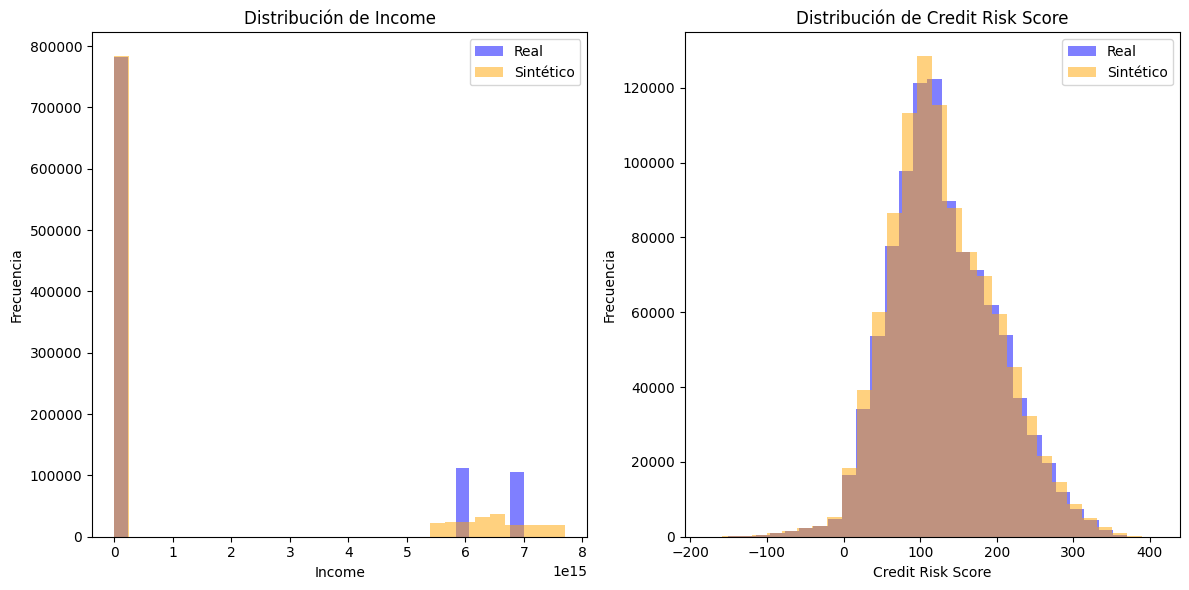

In [13]:
plt.figure(figsize=(12, 6))

# Gráfico para 'income'
plt.subplot(1, 2, 1)
plt.hist(data['income'], bins=30, alpha=0.5, label='Real', color='blue')
plt.hist(syntheticData['income'], bins=30, alpha=0.5, label='Sintético', color='orange')
plt.title('Distribución de Income')
plt.xlabel('Income')
plt.ylabel('Frecuencia')
plt.legend()

# Gráfico para 'credit_risk_score'
plt.subplot(1, 2, 2)
plt.hist(data['credit_risk_score'], bins=30, alpha=0.5, label='Real', color='blue')
plt.hist(syntheticData['credit_risk_score'], bins=30, alpha=0.5, label='Sintético', color='orange')
plt.title('Distribución de Credit Risk Score')
plt.xlabel('Credit Risk Score')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar gráficos
plt.tight_layout()
plt.show()